<a href="https://colab.research.google.com/github/lucasegonzalez/Notebooks/blob/main/DeepLearning_con_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [20]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

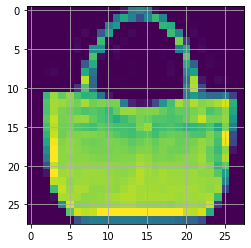

In [21]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

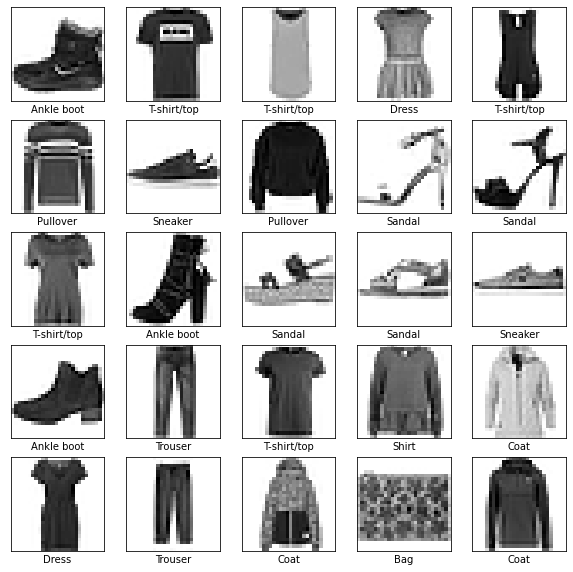

In [22]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  

In [23]:
model = keras.Sequential([keras.layers.Flatten(input_shape = ( 28, 28)), keras.layers.Dense(128, activation = tf.nn.relu ), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [30]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8478 - accuracy: 0.7003
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6468 - accuracy: 0.7735
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5785 - accuracy: 0.7972
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5326 - accuracy: 0.8141
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5071 - accuracy: 0.8250


In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.8308
Accuracy 0.8307999968528748


In [34]:
prediction = model.predict(test_images)

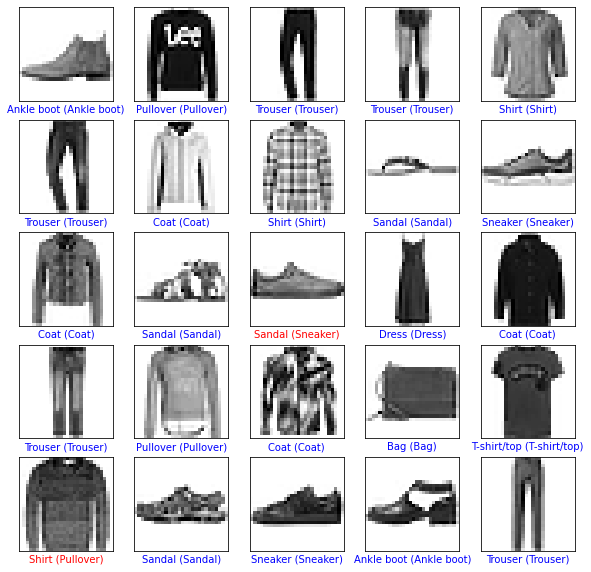

In [38]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        colorText = 'blue'
    else:
        colorText = 'red'
    plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color=colorText)
